In [ ]:
# Diego Esteban Zepeda Ceballos
# A01026512

## Predicción del consumo de gasolina usando TensorFlow

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Descargar el conjunto de datos

In [2]:
data = pd.read_csv('petrol_consumption.csv')

### Exploración de los datos

In [3]:
data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# Obtenga el tamaño del dataset (número de ejemplos y número de características) con la función shape
data.shape
# Visualice el DataFrame con la función head(), tail() o sample()
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
# Características
X = data.iloc[:, 0:4]
X.shape

(48, 4)

In [6]:
# Objetivo
y = data.Petrol_Consumption
y.shape

(48,)

In [7]:
# Separe el conjunto de datos en entrenamiento y prueba  (relación: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (38, 4)
Tamaño del conjunto de datos de prueba:  (10, 4)


### Preprocesamiento de los datos

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Definición del modelo

In [10]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(1))
model.compile(loss='mse' , optimizer='adam', metrics=["mean_squared_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

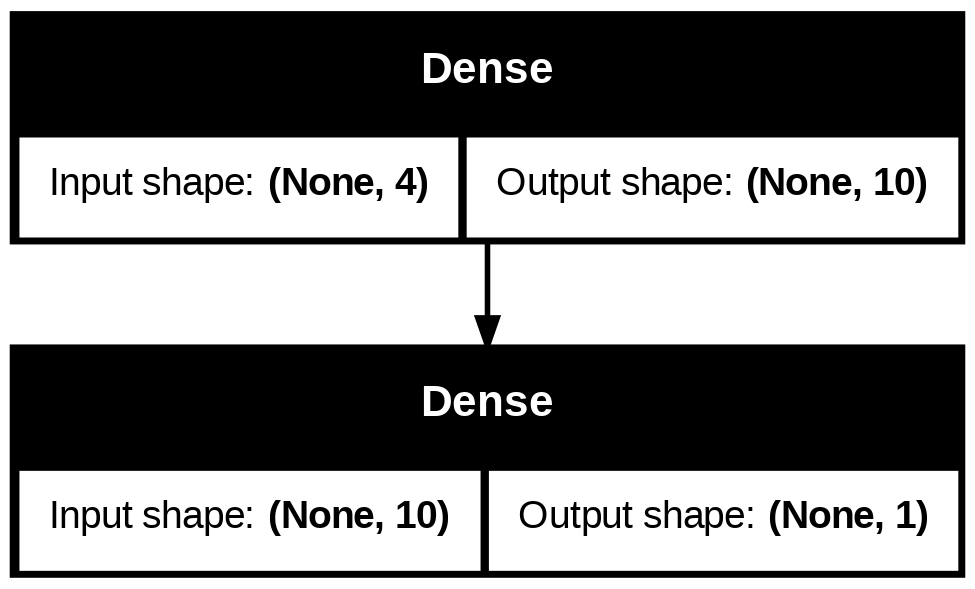

In [12]:
plot_model(model, show_shapes=True)

### Entrenamiento del modelo

In [13]:
es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=1)

In [14]:
# Entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,verbose=1, callbacks=[es])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 353777.1250 - mean_squared_error: 353777.1250 - val_loss: 307859.6250 - val_mean_squared_error: 307859.6250
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 361481.2188 - mean_squared_error: 361481.2188 - val_loss: 307842.9062 - val_mean_squared_error: 307842.9062
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 354935.4688 - mean_squared_error: 354935.4688 - val_loss: 307825.8438 - val_mean_squared_error: 307825.8438
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 357063.6250 - mean_squared_error: 357063.6250 - val_loss: 307807.8125 - val_mean_squared_error: 307807.8125
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 357184.0312 - mean_squared_error: 357184.0312 - val_loss: 307789.5938 - val_mean_squared_error: 307789.5938
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 351247.3750 - mean_squared_error: 351247.3750 - val_loss: 307771.5312 - val_mean_squared_error: 307771.5312
Epoch 7/5

### Evaluación del modelo

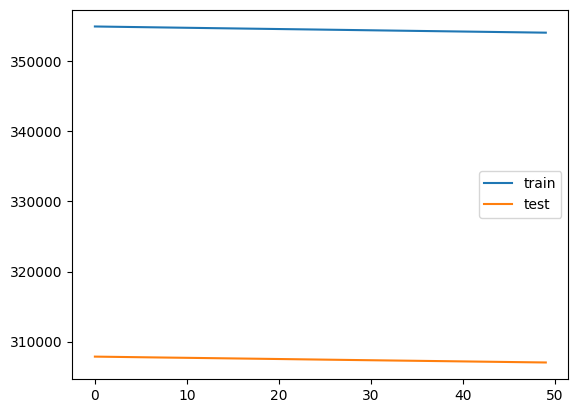

In [15]:
# Ploteando training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [16]:
# Error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
554.0973760146001


In [17]:
y_pred.flatten()

array([0.30852   , 0.63230693, 0.43554932, 0.8461049 , 0.5562635 ,
       0.5205394 , 1.1414535 , 0.577315  , 0.70524395, 0.5374368 ],
      dtype=float32)

In [18]:
y_test

,Petrol_Consumption
29,534
4,410
26,577
30,571
32,577
37,704
34,487
40,587
7,467
10,580


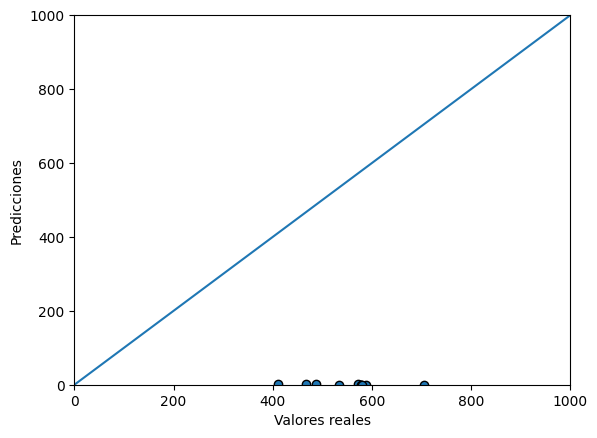

In [19]:
# Comparando predicciones vs valores reales
plt.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

### Realizar una predicción

In [20]:
new_value = [8.0, 3448, 5399, 0.5]
# Escalar la nueva observación
new_value = sc.transform([new_value])
# Utilizar predict para predecir la nueva observación
prediction = model.predict(new_value)
print('Predicción: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicción:  [[0.7118092]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Activity

Modify the hyperparameters and/or architecture in order to improve the current results.

In [25]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [29]:
es = EarlyStopping(monitor='val_loss', patience=30, mode='min', verbose=1, restore_best_weights=True)

In [30]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=300,
                    batch_size=8,
                    verbose=1,
                    callbacks=[es])

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 364953.5000 - mean_absolute_error: 592.2053 - mean_squared_error: 364953.5000 - val_loss: 307678.1875 - val_mean_absolute_error: 549.3824 - val_mean_squared_error: 307678.1875
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 387234.3438 - mean_absolute_error: 608.7794 - mean_squared_error: 387234.3438 - val_loss: 307480.0000 - val_mean_absolute_error: 549.2011 - val_mean_squared_error: 307480.0000
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 371759.4062 - mean_absolute_error: 596.6791 - mean_squared_error: 371759.4062 - val_loss: 307275.5312 - val_mean_absolute_error: 549.0145 - val_mean_squared_error: 307275.5312
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 355991.2500 - mean_absolute_error: 587.1888 - mean_squared_error: 355991.2500 - val_loss: 307060.6875 - val_mean_absolute_error: 548.8187 - val_mean_squared_error: 307060.6875
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 361955

In [31]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Root Mean Squared Error: 78.0578171679558


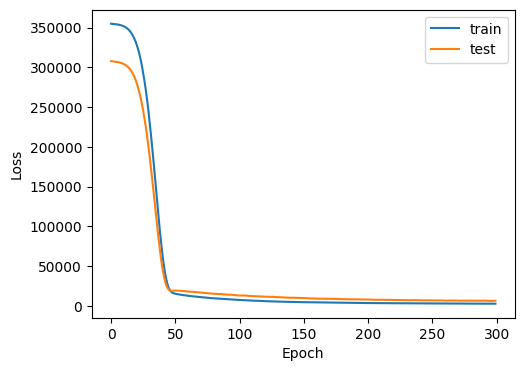

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

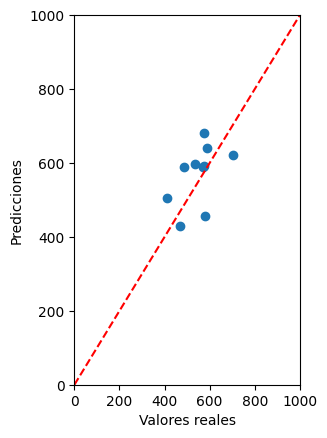

In [50]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred.flatten())
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, 'r--')

In [48]:
new_value = [8.0, 3448, 5399, 0.5]
new_value = sc.transform([new_value])
prediction = model.predict(new_value)
print('Predicción: ', prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicción:  [[595.7535]]


In [45]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: -0.039864301681518555
